# Bayesian Functional Overlapping Clusters

## Single Stochastic Process

Let $X(t)$ be a realization from a stochastic process evaluated at time $t \in \mathcal{T}$ with $\mathbb{E}\{X(t)\} = m(t)$ and $Cov\{X(t),X(s)\} = C(t,s)$. Assuming $X \in L^2$ (square-integrable function), we can use the Karhunen-Loève Theorem to get the following:

$$X(t) = m(t) + \sum_{k=1}^\infty Z_k e_k(t)$$

where $Z_k = \int_a^b Y_i(t) e_k(t) dt$ and $e_k(t)$ is an eigenvector corresponding to the eigenvalue $\lambda_k$. We know that $\mathbb{E}(Z_k) = 0$ and $Cov(Z_i, Z_j) = \delta_{i=j}\lambda_j$.

Assume that $\lambda_1 \ge \lambda_2 \ge \dots \ge \lambda_M \ge \dots$. We can then approximate $X(t)$ using a truncated Karhunen-Loève expansion (note, this approximation will mimize the mean square error):

$$X(t) \approx m(t) + \sum_{k=1}^M Z_k e_k(t)$$

Let $\chi_k = \frac{1}{\sqrt{\lambda_k}}\int_a^b Y_i(t) e_k(t) dt = \frac{1}{\sqrt{\lambda_k}}Z_k$. Thus we can rewrite our truncated KL expansion as 

$$X(t) \approx m(t) + \sum_{k=1}^M \sqrt{\lambda_k}\chi_k e_k(t)$$
where $\chi_k \sim \mathcal{N}(0,1)$. Let $\psi_k(t) = \sqrt{\lambda_k}e_k(t)$. Thus, we have

$$X(t) \approx m(t) + \sum_{k=1}^M \chi_k \psi_k(t)$$

We can approximate $m(t)$ and $\psi_k(t)$ by using a basis expansion. Let $\mathbf{S}(t) \in \mathbb{R}^p$ be a vector of basis functions evaluated at time $t$. Thus we have

$$X(t) \approx \mathbf{S}(t)'\boldsymbol{\nu} + \sum_{k=1}^M \chi_k \mathbf{S}(t)'\boldsymbol{\phi}_k = S(t)'\boldsymbol{\nu} + S(t)'\boldsymbol{\Phi}\boldsymbol{\chi}$$

Using this framework, we have that $\mathbb{E}\{X(t)\} = S(t)'\boldsymbol{\nu}$ and $Cov\{X(t), X(s)\} = S(t)'(\boldsymbol{\Phi}\boldsymbol{\Phi}')S(s)$. Due to the normality of $\chi_k$, we have that $X(.) \mathrel{\dot\sim} GP\left(S(t)'\boldsymbol{\nu},  S(t)'(\boldsymbol{\Phi}\boldsymbol{\Phi}')S(s)\right)$.

***

NOTES

- KL expansion is used because it gives the reader an intuition on why we use the particular form to estimate the covariance
    - $S(t)'\Phi$ can no longer be interpreted as eigen-functions
        - In order for us to interperet it that way, we would need to enforce orthogonality (stiefel manifold) and also enforce that the magnitude is decreasing
        - These restrictions are often more trouble than it is worth because we can just estimate the eigenfunctions from the estimated covariance matrix at each MCMC iteration. Theoretically this will be equivalent to estimating the eigen-functions directly
            - By using this method, we do not have to worry about rotations of eigenfunctions, as our estimator is invariant to that. It should also lead to better exploration of the sample space of covariance matrices.

## Extension to Additive Mean Structure

Let $m_1(t), \dots, m_K(t)$ be $K$ different square-integrable functions. As in clustering, we can suppose that we have $K$ clusters and $m_1(t), \dots, m_k(t)$ be the mean functions defining each of the $K$ clusters. Let $z_{l}$ be a latent variable that indicates whether or not $X$ belongs to the $k^{th}$ cluster. Unlike in clustering, we will restrict class membership to only one group (i.e. the restriction that $\sum_l z_{l} = 1$ is removed). Assuming that the covariance function is the same regardless of class membership, we have

$$X(t)|\mathbf{z} \approx \left(\sum_{l=1}^k z_l m_l(t)\right) + \sum_{k=1}^M \chi_k \psi_k(t)$$

Using the basis approximation, we have
$$X(t)|\mathbf{z} \approx \left(\sum_{l=1}^Kz_l\mathbf{S}(t)'\boldsymbol{\nu}_l\right) + \sum_{k=1}^M \chi_k \mathbf{S}(t)'\boldsymbol{\phi}_k = \left(\sum_{l=1}^Kz_l\mathbf{S}(t)'\boldsymbol{\nu}_l\right) + S(t)'\boldsymbol{\Phi}\boldsymbol{\chi}$$

Thus, we have that $X(.)|\mathbf{z} \mathrel{\dot\sim} GP\left(\sum_{l=1}^Kz_l\mathbf{S}(t)'\boldsymbol{\nu}_l,S(t)'(\boldsymbol{\Phi}\boldsymbol{\Phi}')S(s)\right)$


## Extension to Individualized Covariance Functions

When considering a model that allows for membership to multiple classes, it is important to note that we can rewrite this model (using more parameters) as a classical clustering model. Let $\mathbf{Z}$ represent the class membership of an overlapping clusters model (where each row contains the memebership for an observation) and $\mathbf{C}$ represent the class membership of a classical clustering model. Consider the following example.

$$\mathbf{Z} = 
\begin{bmatrix}
1 & 0 & 0 & 0 & 0\\
0 & 1 & 1 & 0 & 0\\
1 & 0 & 1 & 0 & 0\\
0 & 1 & 1 & 0 & 0\\
 & & \vdots & & \\
\end{bmatrix} \rightarrow \begin{bmatrix}
1 & 0 & 0 & 0 & \dots \\
0 & 1 & 0 & 0 & \dots \\
0 & 0 & 1 & 0 & \dots \\
0 & 1 & 0 & 0 & \dots \\
& & \vdots & & \\ 
\end{bmatrix}= \mathbf{C}$$


While there is not a unique mapping, let $\Omega()$ be a mapping that maps the class membership matrix of the overlapping clusters model to the class membership matrix of the classical clustering model. Thus in the example above, $\Omega(\mathbf{z}_i) = \mathbf{c}_i$ where $\mathbf{z}_i$ and $\mathbf{c}_i$ are the $i^{th}$ rows of the $\mathbf{Z}$ and $\mathbf{C}$ matrices respectively. Thus we can define the covariance of the stochastic process based off of $\Omega(\mathbf{z})$. Thus we have
$$X(t) \approx \left(\sum_{l=1}^k z_l m_l(t)\right) + \sum_{k=1}^M \chi_k \psi_{(k, \Omega(\mathbf{z}))}(t)$$

Using the basis approximation, we have
$$X(t) \approx \left(\sum_{l=1}^Kz_l\mathbf{S}(t)'\boldsymbol{\nu}_l\right) + \sum_{k=1}^M \chi_k \mathbf{S}(t)'\boldsymbol{\phi}_{(k, \Omega(\mathbf{z}))} = \left(\sum_{l=1}^Kz_l\mathbf{S}(t)'\boldsymbol{\nu}_l\right) + S(t)'\boldsymbol{\Phi}_{\Omega(\mathbf{z})}\boldsymbol{\chi}$$

Thus, we have that $X(.) \sim GP\left(\sum_{l=1}^Kz_l\mathbf{S}(t)'\boldsymbol{\nu}_l,S(t)'(\boldsymbol{\Phi}_{\Omega(\mathbf{z})}\boldsymbol{\Phi}_{\Omega(\mathbf{z})}')S(s)\right)$

One downfall to this method is that it increases exponentially with respect to the number of clusters (for $K$ clusters, we have $2^K$ covariance matrices). One way that this can be minimized for large $K$ is to specify a maximum number of memberships for each observation. For example, if we have 30 clusters, without any restrictions on the membership, we could have to estimate up to roughly 1 billion covariance matrices. By limiting the group membership, we can reduce it to $4,525$ covariance matrices.

## Sum of Gaussian Processes

Notice in the above case, we did not use the fact that the effects were additive. Consider $K$ Gaussian Processes $X_1(.), \dots, X_K(.)$ with means $m_1(.), \dots, m_K(.)$, and covariances $C_1(.,.), \dots, C_K(.,.)$ (one for each cluster. Letting $\mathbf{z} \in \{0,1\}^K$ be the latent variable that indicates membership to a cluster, we can see that for any $\mathbf{t} \in \mathcal{T}^n$, we have
$$\mathbb{E}\left(\sum_{i=1}^K z_i X_i(\mathbf{t})\right) = \sum_{i=1}^K z_i m_i(\mathbf{t})$$
and
\begin{aligned}
Cov\left(\sum_{i=1}^K z_i X_i(\mathbf{t})\right) & =\mathbb{E}\left(\left[\sum_{i=1}^K z_i X_i(\mathbf{t})\right]\left[\sum_{i=1}^K z_i X_i(\mathbf{t})\right]'\right) - \left[\mathbb{E}\left(\sum_{i=1}^K z_i X_i(\mathbf{t})\right)\right]\left[\mathbb{E}\left(\sum_{i=1}^K z_i X_i(\mathbf{t})\right)\right]'\\
& = \sum_{i=1}^n\sum_{j=1}^n z_iz_j\mathbb{E}\left[ X_i(\mathbf{t})X_j(\mathbf{t})'\right] - \sum_{i=1}^n\sum_{j=1}^n z_iz_j\mathbb{E}\left[X_i(\mathbf{t})\right]\mathbb{E}\left[X_j(\mathbf{t})\right]'\\
& = \sum_{i=1}^n\sum_{j=1}^n z_iz_j \left(\mathbb{E}\left[ X_i(\mathbf{t})X_j(\mathbf{t})'\right] - \mathbb{E}\left[X_i(\mathbf{t})\right]\mathbb{E}\left[X_i(\mathbf{t})\right]' \right)\\
& = \sum_{i=1}^n\sum_{j=1}^n z_iz_j Cov(X_i(\mathbf{t}),X_j(\mathbf{t})) = \sum_{i=1}^n z_i Var(X_i(\mathbf{t})) + 2\sum_{1 \le i < j \le K} z_iz_jCov(X_i(\mathbf{t}), X_j(\mathbf{t}))
\end{aligned}

Since the sum of Gaussian Distributions are Gaussian, we have that
$$\sum_{i=1}^Kz_iX_i(\mathbf{t}) \sim GP\left(\sum_{i=1}z_i m_i(\mathbf{t}), \sum_{i=1}^n z_i Var(X_i(\mathbf{t})) + 2\sum_{1 \le i < j \le K} z_iz_jCov(X_i(\mathbf{t}), X_j(\mathbf{t}))\right)$$
Since $Cov(X_i(\mathbf{t}), X_j(\mathbf{t}))$ is the Cross-Covariance matrix for two random vectors $Cov(X_i(\mathbf{t}), X_j(\mathbf{t}))$ need not be positive semi-definite (however $\sum_{i=1}^n\sum_{j=1}^n z_i Cov(X_i(\mathbf{t}),X_j(\mathbf{t}))$ must be positive semi-definite). 

Using the basis expansion for $X_i(\mathbf{t}) \approx S(\mathbf{t})'\kappa_i$ for some $\kappa_i \in \mathbb{R}^p$, we have $$\sum_{i=1}^Kz_iX_i(\mathbf{t}) \mathrel{\dot\sim} GP\left(\sum_{i=1}z_i S(\mathbf{t})'\boldsymbol{\nu}_i, \sum_{i=1}^K z_i S(\mathbf{t})'(\boldsymbol{\Phi}_{i}\boldsymbol{\Phi}_{i}')S(\mathbf{t}) + 2\sum_{1 \le i < j \le K} z_iz_jS(\mathbf{t})'Cov(\kappa_i, \kappa_j)S(\mathbf{t})\right)$$


Since 
$$Cov(\kappa_i, \kappa_j) = \begin{bmatrix}
Cov(\kappa_{(i,1)}, \kappa_{(j,1)}) & Cov(\kappa_{(i,1)}, \kappa_{(j,2)}) & \dots & Cov(\kappa_{(i,1)}, \kappa_{(j,p)})\\
Cov(\kappa_{(i,2)},\kappa_{(j,1)}) & Cov(\kappa_{(i,2)}, \kappa_{(j,2)}) & \dots & Cov(\kappa_{(i,2)}, \kappa_{(j,p)})\\
\vdots & \vdots & \ddots & \vdots \\
Cov(\kappa_{(i,p)}, \kappa_{(j,1)}) & Cov(\kappa_{(i,p)}, \kappa_{(j,2)}) & \dots & Cov(\kappa_{(i,p)}, \kappa_{(j,p)})
\end{bmatrix}$$
we can rewrite $Cov(\kappa_{(i,1)}, \kappa_{(j,1)})$ as $Cov(\kappa_{(i,l)}, \kappa_{(j,k)}) = \rho_{(i,j,l,k)}||\boldsymbol{\phi}_l||_2\; ||\boldsymbol{\phi}_k||_2$ where $\boldsymbol{\phi}_k$ is the $k^{th}$ row of $\boldsymbol{\Phi}$. Thus we can see that the Cross-Covariance matrix is
$$Cov(\kappa_i, \kappa_j) = \begin{bmatrix}
\rho_{(i,j,1,1)}||\boldsymbol{\phi}_1||_2\; ||\boldsymbol{\phi}_1||_2 & \rho_{(i,j,1,2)}||\boldsymbol{\phi}_1||_2\; ||\boldsymbol{\phi}_2||_2 & \dots & \rho_{(i,j,1,p)}||\boldsymbol{\phi}_1||_2\; ||\boldsymbol{\phi}_p||_2\\
\rho_{(i,j,1,2)}||\boldsymbol{\phi}_1||_2\; ||\boldsymbol{\phi}_2||_2 & \rho_{(i,j,2,2)}||\boldsymbol{\phi}_2||_2\; ||\boldsymbol{\phi}_2||_2 & \dots & \rho_{(i,j,2,p)}||\boldsymbol{\phi}_2||_2\; ||\boldsymbol{\phi}_p||_2\\
\vdots & \vdots & \ddots & \vdots \\
\rho_{(i,j,1,p)}||\boldsymbol{\phi}_1||_2\; ||\boldsymbol{\phi}_p||_2 & \rho_{(i,j,2,p)}||\boldsymbol{\phi}_2||_2\; ||\boldsymbol{\phi}_p||_2 & \dots & \rho_{(i,j,p,p)}||\boldsymbol{\phi}_p||_2\; ||\boldsymbol{\phi}_p||_2
\end{bmatrix}$$

Thus we have $K$ $\boldsymbol{\Phi}$ matrices to estimate ($KMP$ variables to estimate) and $K(K-1)/2$ Cross-Covariance matrices to estimate ($K(K-1)P(P+1)/4$ variables to estimate). Using the parameterization above, we would have $2^{K}- 1 $ $\boldsymbol{\Phi}$ matrices to estimate ($(2^K-1)MP$ elements).

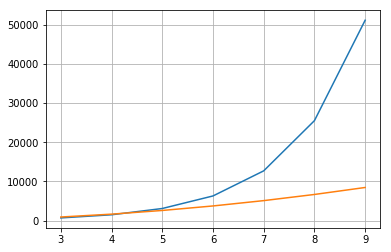

In [14]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
K = np.arange(3, 10, 1)
elem1 = (2**K  -1) * 5 * 20
elem2 = (K * 5 * 20) + (K * (K - 1) * 20 * (20 + 1)/ 4)

fig, ax = plt.subplots()
ax.plot(K, elem1)
ax.plot(K, elem2)
ax.grid()

Thus we can see that the number of parameters scales nicely with respect to $K$. In the following, we will refer to $\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}$ as
$$\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}= \sum_{i=1}^K z_i S(\mathbf{t})'(\boldsymbol{\Phi}_{i}\boldsymbol{\Phi}_{i}')S(\mathbf{t}) + 2\sum_{1 \le i < j \le K} z_iz_jS(\mathbf{t})'Cov(\kappa_i, \kappa_j)S(\mathbf{t})$$

## Modeling

Let $Y_i(t)$ be the observed samples from the $i^{th}$ stochastic process, where $i = 1, \dots, n$. We will assume that there is some normal noise around the observed data points, and use the following model:
$$Y_i(t) = f_i(t) + \epsilon_i(t)$$
where $\epsilon_i(t) \sim \mathcal{N}(0, \sigma^2_\epsilon)$.

Let $\mathbf{t}_i^{obs} = [t_1, t_2, \dots, t_{\tilde{n}_i}]$ be a vector of observed time points. Let 
$$f_i(.)|\mathbf{z}_i, \boldsymbol{\Theta} \sim GP\left(\sum_{l=1}^Kz_{il}\mathbf{S}(t)'\boldsymbol{\nu}_l,S(t)'(\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}')S(s)\right)$$
Let $S(\mathbf{t}_i^{obs}) = [S(t_1), \dots, S(t_{\tilde{n}_i})] \in \mathbb{R}^{p \times \tilde{n}_i}$. Thus for $\mathbf{t}_i^{obs}$, $i = 1, \dots, n$, we have that
$$f_i(\mathbf{t}_i^{obs})| \mathbf{z}_i, \boldsymbol{\Theta} \sim \mathcal{N}\left(\sum_{l=1}^Kz_{il}S(\mathbf{t}_i^{obs})'\boldsymbol{\nu}_l,S(\mathbf{t}_i^{obs})'(\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}')S(\mathbf{t}_i^{obs})\right)$$

Let $\mathbf{t}_i^* = [t_1, \dots, t_{g_i}]$ be a set of unobserved time points such that $t_j \in \mathcal{T},\; j = 1, \dots, g_i$. Suppose we want to find $p(f_i(\mathbf{t}_i^*)|f_i(\mathbf{t}_i^{obs}))$. We know that
$$p\left(\begin{bmatrix}
f_i(\mathbf{t}_{obs}) \\
f_i(\mathbf{t}^*)
\end{bmatrix}| \mathbf{z}_i, \boldsymbol{\Theta}\right) \propto exp\left\{-\frac{1}{2}\begin{bmatrix}
\left(f_i(\mathbf{t}_i^{obs}) - \sum_{l=1}^Kz_{il}S'(\mathbf{t}_i^{obs})\boldsymbol{\nu}_l\right)' & \left(f_i(\mathbf{t}_i^*) - \sum_{l=1}^Kz_{il}S'(\mathbf{t}_i^*)\boldsymbol{\nu}_l\right)'\\
\end{bmatrix}\begin{bmatrix}
S(\mathbf{t}_i^{obs})'\left(\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}'\right)S(\mathbf{t}_i^{obs}) & S(\mathbf{t}_i^{obs})'\left(\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}'\right)S(\mathbf{t}_i^*) \\
S(\mathbf{t}_i^*)'\left(\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}'\right)S(\mathbf{t}_i^{obs}) & S(\mathbf{t}_i^*)'\left(\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}'\right)S(\mathbf{t}_i^*)
\end{bmatrix}^{+}\begin{bmatrix}
f_i(\mathbf{t}_i^{obs}) - \sum_{l=1}^Kz_{il}S'(\mathbf{t}_i^{obs})\boldsymbol{\nu}_l\\
f_i(\mathbf{t}_i^*) - \sum_{l=1}^Kz_{il}S'(\mathbf{t}_i^*)\boldsymbol{\nu}_l
\end{bmatrix}\right\}$$

Let $$\begin{bmatrix}
S(\mathbf{t}_i^{obs})'\left(\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}'\right)S(\mathbf{t}_i^{obs}) & S(\mathbf{t}_i^{obs})'\left(\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}'\right)S(\mathbf{t}_i^*) \\
S(\mathbf{t}_i^*)'\left(\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}'\right)S(\mathbf{t}_i^{obs}) & S(\mathbf{t}_i^*)'\left(\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}'\right)S(\mathbf{t}_i^*)
\end{bmatrix}^{+} = \begin{bmatrix}
\mathbf{A}_i & \mathbf{B}_i \\
\mathbf{C}_i & \mathbf{D}_i \\
\end{bmatrix}$$

Thus we have

$$ p\left(
f_i(\mathbf{t}_i^*)z| \mathbf{z}_i, \boldsymbol{\Theta}\right) \propto exp \left\{-\frac{1}{2}\left[ f_i(\mathbf{t}_i^*)'\mathbf{D}_if_i(\mathbf{t}_i^*) - 2f_i(\mathbf{t}_i^*)' \left(\mathbf{C}_i\left(\sum_{l=1}^Kz_{il}S(\mathbf{t}_i^{obs})'\boldsymbol{\nu}_l - f_i(\mathbf{t}_i^{obs})\right) + \mathbf{D}_i\left(\sum_{l=1}^Kz_{il}S(\mathbf{t}_i^*)'\boldsymbol{\nu}_l \right)\right)\right]\right\}$$

Thus letting $\mathbf{M}_i = \mathbf{D}_i^+$ and $\mathbf{m}_i =  \mathbf{C}_i\left(\sum_{l=1}^Kz_{il}S(\mathbf{t}_i^{obs})'\boldsymbol{\nu}_l - f_i(\mathbf{t}_i^{obs})\right) + \mathbf{D}_i\left(\sum_{l=1}^Kz_{il}S(\mathbf{t}_i^*)'\boldsymbol{\nu}_l \right)$
$$f_i(\mathbf{t}_i^*|\mathbf{z}_i, \boldsymbol{\Theta}) \sim \mathcal{N}(\mathbf{M}_i\mathbf{m}_i, \mathbf{M}_i)$$

## THE ABOVE IS INCORRECT (CHANGES THE SUPPORT OF f)

For $\mathbf{t}_i \in \mathbb{R}^\tilde{n}$, notice that we have
$$f_i(\mathbf{t}_i)|\mathbf{z}_i, \boldsymbol{\nu}_1, \dots, \boldsymbol{\nu}_K,\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}  \sim \mathcal{N}\left(\sum_{l=1}^Kz_{il}S(\mathbf{t}_i)'\boldsymbol{\nu}_l,S(\mathbf{t}_i)'(\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}')S(\mathbf{t}_i)\right)$$

Since this is a degenerate normal distribution, the support is not valid over $\mathbb{R}^{\tilde{n}}$. In fact it is only valid over $\mu + \text{span}(\boldsymbol{\Sigma})$. Due to the structure of our mean and covariance kernel, we have that $f_i(\mathbf{t}_i) = S(\mathbf{t}_i)'\mathbf{x}$ for some $\mathbf{x} \in \mathbb{R}^p$. Since the dimension of $\mathbf{x}$ is fixed regardless of the dimension of $\mathbf{t}_i$, consider the case when $\text{dim}(\mathbf{t}_i^{obs}) > p$.

Thus we have that $$\begin{bmatrix}
f_i(\mathbf{t}_i^{obs})\\
f_i(\mathbf{t}_i^{*})\\
\end{bmatrix}\left|\mathbf{z}_i,\boldsymbol{\nu}_1, \dots, \boldsymbol{\nu}_K,\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}  \right.\sim \mathcal{N}\left(\begin{bmatrix}
\sum_{l=1}^Kz_{il}S(\mathbf{t}_i^{obs})'\boldsymbol{\nu}_l \\
\sum_{l=1}^Kz_{il}S(\mathbf{t}_i^*)'\boldsymbol{\nu}_l
\end{bmatrix}, \begin{bmatrix}
S(\mathbf{t}_i^{obs})'(\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}')S(\mathbf{t}_i^{obs}) & S(\mathbf{t}_i^{obs})'(\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}')S(\mathbf{t}_i^*) \\
S(\mathbf{t}_i^*)'(\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}')S(\mathbf{t}_i^{obs}) & S(\mathbf{t}_i^*)'(\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}')S(\mathbf{t}_i^*) \\
\end{bmatrix}\right)$$

Thus, from above, we know that
$$\begin{bmatrix}
f_i(\mathbf{t}_i^{obs})\\
f_i(\mathbf{t}_i^{*})\\
\end{bmatrix} = \begin{bmatrix}
S(\mathbf{t}_i^{obs})' \\
S(\mathbf{t}_i^{*})' \\
\end{bmatrix}\mathbf{x}$$

Supppose we want to find the distribution $f_i(\mathbf{t}_i^*)|f_i(\mathbf{t}_i^{obs}), \mathbf{z}_i, \boldsymbol{\nu}_1, \dots, \boldsymbol{\nu}_K,\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}$. Thus we are given $f_i(\mathbf{t}_i^{obs}) = S(\mathbf{t}_i^{obs})' \mathbf{x}$, and since $\text{dim}(\mathbf{t}_i^{obs}) > p$ (assuming no repeat time points), we know that $\mathbf{x}$ is unique and completely deterimined by $f_i(\mathbf{t}_i^{obs})$. Therefore, $f_i(\mathbf{t}_i^*)$ is also already determined, and is not random when conditioned on $f_i(\mathbf{t}_i^{obs})$.

***

So far, we have the following:

$$\left[y_i(\mathbf{t}^*), f_i(\mathbf{t}^*), f_i(\mathbf{t}_{obs}), \boldsymbol{\Theta}|y_i(\mathbf{t}_{obs}) \right] \propto \left[\boldsymbol{\Theta}\right] \times \left[f_i(\mathbf{t}_{obs})|\boldsymbol{\Theta}\right] \times \left[y_i(\mathbf{t}_{obs})| f_i(\mathbf{t}_{obs}), \boldsymbol{\Theta}\right]\times \left[f_i(\mathbf{t}^*)|f_i(\mathbf{t}_{obs}), \boldsymbol{\Theta}\right] \times \left[y_i(\mathbf{t}^*)|f_i(\mathbf{t}^*), \boldsymbol{\Theta}\right]$$

We know that
$$f_i(\mathbf{t}_i^{obs}) \sim \mathcal{N}\left(\sum_{l=1}^Kz_{il}\mathbf{S}(\mathbf{t}_i^{obs})'\boldsymbol{\nu}_l,S(\mathbf{t}_i^{obs})'(\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}')S(\mathbf{t}_i^{obs})\right); \;\;\; i = 1, \dots, N$$
$$\left[y_i(\mathbf{t}_{obs})| f_i(\mathbf{t}_i^{obs}), \boldsymbol{\Theta}\right] = \mathcal{N}\left(f_i(\mathbf{t}_{obs}), \sigma^2_\epsilon \mathbf{I}\right); \;\;\; i = 1,\dots, N$$
$$\left[y_i(\mathbf{t}_i^*)|f_i(\mathbf{t}^*), \boldsymbol{\Theta}\right] = \mathcal{N}\left(f_i(\mathbf{t}^*),  \sigma^2_\epsilon \mathbf{I}\right); \;\;\; i =1,\dots, N$$

Thus we are left with just defining the priors on $\boldsymbol{\Theta} = \{ \boldsymbol{\nu}_1,\dots, \boldsymbol{\nu}_K, \boldsymbol{\Phi}_1,\dots, \boldsymbol{\Phi}_R, \sigma^2_\epsilon, \tau^2_1, \dots, \tau^2_K, \mathbf{Z}\}$. We can start with some standard priors for $\sigma^2_\epsilon$ and $\boldsymbol{\nu}_1,\dots, \boldsymbol{\nu}_K$.
$$\left[\sigma^2_\epsilon\right] = IG(a_0, b_0)$$
$$\left[\boldsymbol{\nu}_l|\tau^2_l \right] \propto exp\left(-\frac{1}{2\tau_l^2}\boldsymbol{\nu}_l'\mathbf{P}\boldsymbol{\nu}_l\right); \;\;\; l = 1,\dots, K$$
$$\left[\tau^2_l \right] = IG(a_1,b_1); \;\;\; l = 1,\dots, K$$
where $\mathbf{P}= \begin{bmatrix}
1 & -1 & 0 &  & \\
-1 & 2 & -1 &  &  \\
 & \ddots & \ddots & \ddots&  \\
 &  & -1 & 2 & -1  \\
 &  &  & -1 & 1 \\
\end{bmatrix}$

From $\textit{Sparse Bayesian infinite factor models}$ (Bhattacharya and Dunson, 2011), we can define a prior of $\boldsymbol{\Phi}_l$. We can use this prior to adaptively estimate the covariance using a low rank representation. We will start by assuming that there are $M$ columns in the covariance model. The product gamma prior will stochastically shrink the columns of the matrix $\boldsymbol{\Phi}_l$. Then after $t$ time steps, we will truncate the number of columns depending on the magnitude of the elements in the column. Bhattacharya and Dunson have the following model
$$y_i \sim \mathcal{N}_n(\mathbf{0}, \Omega); \;\;\;\;\; \Omega = \boldsymbol{\Lambda}\boldsymbol{\Lambda}' + \boldsymbol{\Sigma}$$
where $\boldsymbol{\Sigma}$ is a $n \times n$ diagonal matrix with non-negative entries, and $\boldsymbol{\Lambda} \in \mathbb{R}^{p \times h}$. In this case, we will set $\boldsymbol{\Sigma} = \mathbf{0}$, so we are just left with $\Omega = \boldsymbol{\Lambda}\boldsymbol{\Lambda}'$.

We can use the multiplicative gamma process schinkage prior as defined by Bhattacharya and Dunson. Let $\lambda_{jh}$ be the elements in $\boldsymbol{\Lambda}$ ($1 \le j \le P$,  $\;\;1 \le h \le \infty$). Thus we can specify the following as our priors:
$$ \lambda_{jh} | \phi_{jh},\tau_h \sim \mathcal{N}(0, \phi_{jh}^{-1}\tau_h^{-1}), \;\;\;\; \phi_{jh} \sim Gamma(\nu/2, \nu/2), \;\;\; \tau_h = \prod_{l=1}^h \delta_l$$
$$\delta_1 \sim Gamma(a_1, 1), \;\;\; \delta_l = Gamma(a_2, 1)\;\;\; l \ge 2$$


We can approximate $\boldsymbol{\Omega}$ by $\boldsymbol{\Omega}_H = \boldsymbol{\Lambda}_H\boldsymbol{\Lambda}_H'$. Where all of the columns of $\boldsymbol{\lambda}$ from $H+1$ onwards are zero. Theorem 1 in Bhattacharya and Dunson says that the probability of $\boldsymbol{\Omega}_H$ being arbitarily close to $\boldsymbol{\Omega}$ converges to 1 at an exponential rate, so we do not have to worry about the truncation for large enough $H$.

Let $\phi_{(i,j,l)}$ be the $(i,j)^{th}$ element of $\boldsymbol{\Phi}_l$. Thus we have the following:

$$[\phi_{(i,j,l)}|\gamma_{(i,j,l)}, \tilde{\tau}_{j,l}] = \mathcal{N}(0, \gamma_{(i,j,l)}^{-1} \tilde{\tau}_{j,l}^{-1}); \;\;\; i = 1,\dots, P, \;\;\; j = 1, \dots, M,\;\;\; l = 1,\dots, R$$
$$[\gamma_{(i,j,l)}] = Gamma(\nu/2, \nu/2); \;\;\; i = 1,\dots, P, \;\;\; j = 1, \dots, M,\;\;\; l = 1,\dots, R$$
$$\tilde{\tau}_{(j,l)} = \prod_{n=1}^j \delta_{(n,l)}$$
$$[\delta_{(1,l)} ] = Gamma(a_{(1,l)}, 1); \;\;\; l = 1,\dots, R$$
$$[\delta_{(j,l)}] = Gamma(a_{(2,l)}, 1); \;\;\; j = 2, \dots, M \;\;\; l = 1,\dots, R$$
$$[a_{(1,l)}] = Gamma(\alpha_{(1,l)}, \beta_{(1,l)}); \;\;\; l = 1,\dots, R$$
$$[a_{(2,l)}] = Gamma(\alpha_{(2,l)}, \beta_{(2,l)}); \;\;\; l = 1,\dots, R$$

In Dunson, $\alpha_{(i,l)}= 2$, $\beta_{(i,l)} = 1$.


We will start with the case where $k$ is a fixed parameter in the model. Thus we can define a distribution over the binary matrix $\mathbf{Z}$ in a similar fashion to how Griffiths and Ghahramani defined the distribution over a finite binary matrix when deriving the IBP ($\textit{The Indian Buffet Process: An Introduction and Review (Griffiths and Ghahramani 2011)}$).
Thus we will have the following distribution over $\mathbf{Z} \in \mathbb{R}^{N \times K}$
$$[z_{il}|\pi_l] = Bernoulli(\pi_l) \;\; i = 1,\dots, N \;\; l = 1, \dots, K$$
$$[\pi_l] = Beta(\alpha/K, 1)\;\; l = 1, \dots, K$$

## Posterior Inference

Let $\boldsymbol{\zeta}$ be the collection of all the random variables in this model, and let $\boldsymbol{\zeta}_{-\theta}$ be the collection of all random variables in the model minus $\theta$. Thus we have

$$\sigma_{\epsilon}^2|\boldsymbol{\zeta}_{-\sigma_{\epsilon}^2} = \sigma_{\epsilon}^2|y_1(\mathbf{t}_i^{obs}), \dots, y_N(\mathbf{t}_i^{obs}), y_1(\mathbf{t}_i^*), \dots, y_N(\mathbf{t}_i^*), f_1(\mathbf{t}_i^{obs}), \dots, f_N(\mathbf{t}_{obs}), f_1(\mathbf{t}_i^*), \dots, f_N(\mathbf{t}_i^*)$$
$$ \propto (\sigma^2_\epsilon)^{- a_0 -1} exp\left\{-\frac{b_0}{\sigma^2_\epsilon}\right\}\prod_{i=1}^N (2\pi\sigma^2_\epsilon)^{\tilde{n}_i/2} exp\left\{-\frac{1}{2\sigma^2_\epsilon}||y_i(\mathbf{t}_i^{obs}) - f_i(\mathbf{t}_i^{obs})||^2_2\right\}(2\pi\sigma^2_\epsilon)^{g_i/2} exp\left\{-\frac{1}{2\sigma^2_\epsilon}||y_i(\mathbf{t}_i^*). - f_i(\mathbf{t}_i^*)||^2_2 \right\}$$
$$\propto (\sigma^2_\epsilon)^{-(a_0 + \frac{1}{2}\sum_{i=1}^n\tilde{n_i} + \sum_{i=1}^ng_i) -1} exp\left\{-\frac{b_0 + \frac{1}{2}\sum_{i=1}^N\left(||y_i(\mathbf{t}_i^{obs}) - f_i(\mathbf{t}_i^{obs})||^2_2 + ||y_i(\mathbf{t}_i^*). - f_i(\mathbf{t}_i^*)||^2_2\right)}{\sigma^2_\epsilon} \right\}$$
Thus we have
$$\sigma_{\epsilon}^2|\boldsymbol{\zeta}_{-\sigma_{\epsilon}^2} \sim IG\left(a_0 + \frac{1}{2}(\sum_{i=1}^n\tilde{n_i} + \sum_{i=1}^ng_i), b_0 + \frac{1}{2}\sum_{i=1}^N\left(||y_i(\mathbf{t}_i^{obs}) - f_i(\mathbf{t}_i^{obs})||^2_2 + ||y_i(\mathbf{t}_i^*). - f_i(\mathbf{t}_i^*)||^2_2\right)\right)$$

***

$$f_i(\mathbf{t}_i^{obs})| \boldsymbol{\zeta}_{-f_i(\mathbf{t}_i^{obs})} = f_i(\mathbf{t}_i^{obs})|y_i(\mathbf{t}_i^{obs}), \mathbf{z}_1, \dots, \mathbf{z}_K, \boldsymbol{\Phi}_1, \dots, \boldsymbol{\Phi}_R, \boldsymbol{\nu}_1, \dots, \boldsymbol{\nu}_K, \sigma^2_\epsilon; \;\;\; i = 1, \dots, N$$
$$\begin{aligned}
\propto & exp\left\{-\frac{1}{2}\left(f_i(\mathbf{t}_i^{obs}) - \sum_{l=1}^Kz_{il}S(\mathbf{t}_i^{obs})'\boldsymbol{\nu}_l\right)'\left(S(\mathbf{t}_i^{obs})'(\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}')S(\mathbf{t}_i^{obs}) \right)^+\left(f_i(\mathbf{t}_i^{obs}) - \sum_{l=1}^Kz_{il}S(\mathbf{t}_i^{obs})'\boldsymbol{\nu}_l\right)\right\} \\
& \times exp\left\{-\frac{1}{2\sigma^2_\epsilon}(y_i(\mathbf{t}_i^{obs}) - f_i(\mathbf{t}_i^{obs}))'(y_i(\mathbf{t}_i^{obs}) - f_i(\mathbf{t}_i^{obs})) \right\}
\end{aligned}$$

$$\begin{aligned}
\propto exp\left\{-\frac{1}{2}\left[ f_i(\mathbf{t}_i^{obs})' \left(\left(S(\mathbf{t}_i^{obs})'(\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}')S(\mathbf{t}_i^{obs}) \right)^+ + \frac{1}{\sigma^2_\epsilon}\mathbf{I}_{\tilde{n}_i}\right) f_i(\mathbf{t}_i^{obs})\\
- 2f_i(\mathbf{t}_i^{obs})'\left(\frac{1}{\sigma^2_\epsilon}y_i(\mathbf{t}_i^{obs}) +  \left(S(\mathbf{t}_i^{obs})'(\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}')S(\mathbf{t}_i^{obs}) \right)^+\left[\sum_{l=1}^Kz_{il}\mathbf{S}(\mathbf{t}_i^{obs})'\boldsymbol{\nu}_l \right] \right)\right]\right\}
\end{aligned}$$

Let $$\mathbf{W}_i = \left(\left(S(\mathbf{t}_i^{obs})'(\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}')S(\mathbf{t}_i^{obs}) \right)^+ + \frac{1}{\sigma^2_\epsilon}\mathbf{I}_{\tilde{n}_i}\right)^{-1}$$
and 
$$\mathbf{w}_i = \frac{1}{\sigma^2_\epsilon}y_i(\mathbf{t}_i^{obs}) + \left(S(\mathbf{t}_i^{obs})'(\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}')S(\mathbf{t}_i^{obs}) \right)^+\left[\sum_{l=1}^Kz_{il}\mathbf{S}(\mathbf{t}_i^{obs})'\boldsymbol{\nu}_l \right]$$

Thus we have that
$$f_i(\mathbf{t}_i^{obs})| \boldsymbol{\zeta}_{-f_i(\mathbf{t}_i^{obs})} \sim \mathcal{N}(\mathbf{W}_i\mathbf{w}_i, \mathbf{W}_i); \;\;\; i = 1,\dots, N$$

***

##  THE ABOVE IS INCORRECT (CHANGES THE SUPPORT OF f)

Due to the fact that $f_i(\mathbf{t}_i^{obs})$ must be in $\mathcal{S} = \left\{S(\mathbf{t}_i^{obs})\sum_{l=1}^k z_{il}\nu_l + S(\mathbf{t}_i^{obs})'(\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}')S(\mathbf{t}_i^{obs})\mathbf{v} \left| \mathbf{v} \in \mathbb{R}^{n_i}\right.\right\}$, we cannot use the above method. We can however use the above pdf with a modification to ensure that $f_i(\mathbf{t}_i^{obs}) \in \mathcal{S}$.
$$\begin{aligned}
f_i(\mathbf{t}_i^{obs})| \boldsymbol{\zeta}_{-f_i(\mathbf{t}_i^{obs})} & \propto \mathbb{1}\left(f_i(\mathbf{t}_i^{obs}) \in \mathcal{S}\right) exp\left\{-\frac{1}{2}\left[ f_i(\mathbf{t}_i^{obs})' \left(\left(S(\mathbf{t}_i^{obs})'(\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}')S(\mathbf{t}_i^{obs}) \right)^+ + \frac{1}{\sigma^2_\epsilon}\mathbf{I}_{\tilde{n}_i}\right) f_i(\mathbf{t}_i^{obs})\right.\right.\\
& \left.\left.- 2f_i(\mathbf{t}_i^{obs})'\left(\frac{1}{\sigma^2_\epsilon}y_i(\mathbf{t}_i^{obs}) +  \left(S(\mathbf{t}_i^{obs})'(\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}')S(\mathbf{t}_i^{obs}) \right)^+\left[\sum_{l=1}^Kz_{il}\mathbf{S}(\mathbf{t}_i^{obs})'\boldsymbol{\nu}_l \right] \right)\right]\right\}
\end{aligned}$$


We can instead let $f_i(\mathbf{t}_i^{obs}) = S(\mathbf{t}_i^{obs})\sum_{l=1}^k z_{il}\nu_l + S(\mathbf{t}_i^{obs})'(\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}')S(\mathbf{t}_i^{obs})\mathbf{v}$ and find the distribution with respect to $\mathbf{v}$.

$$\begin{aligned}
f_i(\mathbf{t}_i^{obs})| \boldsymbol{\zeta}_{-f_i(\mathbf{t}_i^{obs})} & \propto exp\left\{-\frac{1}{2}\left[ \left( S(\mathbf{t}_i^{obs})\sum_{l=1}^k z_{il}\nu_l + S(\mathbf{t}_i^{obs})'(\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}')S(\mathbf{t}_i^{obs})\mathbf{v}\right)' \left(\left(S(\mathbf{t}_i^{obs})'(\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}')S(\mathbf{t}_i^{obs}) \right)^+ + \frac{1}{\sigma^2_\epsilon}\mathbf{I}_{\tilde{n}_i}\right) \left( S(\mathbf{t}_i^{obs})\sum_{l=1}^k z_{il}\nu_l + S(\mathbf{t}_i^{obs})'(\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}')S(\mathbf{t}_i^{obs})\mathbf{v}\right)\right.\right.\\
& \left.\left.- 2\left(S(\mathbf{t}_i^{obs})\sum_{l=1}^k z_{il}\nu_l + S(\mathbf{t}_i^{obs})'(\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}')S(\mathbf{t}_i^{obs})\mathbf{v} \right)'\left(\frac{1}{\sigma^2_\epsilon}y_i(\mathbf{t}_i^{obs}) +  \left(S(\mathbf{t}_i^{obs})'(\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}')S(\mathbf{t}_i^{obs}) \right)^+\left[\sum_{l=1}^Kz_{il}\mathbf{S}(\mathbf{t}_i^{obs})'\boldsymbol{\nu}_l \right] \right)\right]\right\}
\end{aligned}$$

$$\begin{aligned}
\propto exp\left\{ -\frac{1}{2}\left[\mathbf{v}'\left( S(\mathbf{t}_i^{obs})'(\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}')S(\mathbf{t}_i^{obs}) + \frac{1}{\sigma^2_\epsilon}S(\mathbf{t}_i^{obs})'(\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}')S(\mathbf{t}_i^{obs})S(\mathbf{t}_i^{obs})'(\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}')S(\mathbf{t}_i^{obs})\right)\mathbf{v} \right.\right.\\
\left. \left. -2 \mathbf{v}'\left(S(\mathbf{t}_i^{obs})'(\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}')S(\mathbf{t}_i^{obs})\left(\frac{1}{\sigma^2_\epsilon}y_i(\mathbf{t}_i^{obs}) +  \left(S(\mathbf{t}_i^{obs})'(\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}')S(\mathbf{t}_i^{obs}) \right)^+\left[\sum_{l=1}^Kz_{il}\mathbf{S}(\mathbf{t}_i^{obs})'\boldsymbol{\nu}_l \right]  \right) \right. \right. \right.\\
- \left. \left. \left. S(\mathbf{t}_i^{obs})'(\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}')S(\mathbf{t}_i^{obs})\left( \left(S(\mathbf{t}_i^{obs})'(\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}')S(\mathbf{t}_i^{obs}) \right)^+ + \frac{1}{\sigma^2_\epsilon}\mathbf{I}_{\tilde{n}_i}\right)S(\mathbf{t}_i^{obs})\sum_{l=1}^k z_{il}\nu_l \right)\right] \right\}\\
\end{aligned}$$

Thus lettin $$\mathbf{W}_i = \left( S(\mathbf{t}_i^{obs})'(\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}')S(\mathbf{t}_i^{obs}) + \frac{1}{\sigma^2_\epsilon}S(\mathbf{t}_i^{obs})'(\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}')S(\mathbf{t}_i^{obs})S(\mathbf{t}_i^{obs})'(\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}')S(\mathbf{t}_i^{obs})\right)^+$$
and 
$$\begin{aligned}\mathbf{w}_i = & S(\mathbf{t}_i^{obs})'(\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}')S(\mathbf{t}_i^{obs})\left(\frac{1}{\sigma^2_\epsilon}y_i(\mathbf{t}_i^{obs}) +  \left(S(\mathbf{t}_i^{obs})'(\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}')S(\mathbf{t}_i^{obs}) \right)^+\left[\sum_{l=1}^Kz_{il}\mathbf{S}(\mathbf{t}_i^{obs})'\boldsymbol{\nu}_l \right]  \right) \\
& -S(\mathbf{t}_i^{obs})'(\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}')S(\mathbf{t}_i^{obs})\left( \left(S(\mathbf{t}_i^{obs})'(\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}')S(\mathbf{t}_i^{obs}) \right)^+ + \frac{1}{\sigma^2_\epsilon}\mathbf{I}_{\tilde{n}_i}\right)S(\mathbf{t}_i^{obs})\sum_{l=1}^k z_{il}\nu_l\\
\end{aligned}$$

Thus we have that $\mathbf{v}| \boldsymbol{\zeta}_{-f_i(\mathbf{t}_i^{obs})} \sim \mathcal{N}(\mathbf{W}_i\mathbf{w}_i, \mathbf{W}_i)$. Using the fact that $f_i(\mathbf{t}_i^{obs}) = S(\mathbf{t}_i^{obs})\sum_{l=1}^k z_{il}\nu_l + S(\mathbf{t}_i^{obs})'(\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}')S(\mathbf{t}_i^{obs})\mathbf{v}$, we can recover $f_i(\mathbf{t}_i^{obs})| \boldsymbol{\zeta}_{-f_i(\mathbf{t}_i^{obs})}$.

***
### Alternatively 

Using the common covariance model, we have

$$f_i(\mathbf{t}_i^{obs})|y_i(\mathbf{t}_i^{obs}), f_i(\mathbf{t}_i^*),\mathbf{z}_1, \dots, \mathbf{z}_K, \boldsymbol{\Phi}, \boldsymbol{\nu}_1, \dots, \boldsymbol{\nu}_K, \sigma^2_\epsilon; \;\;\; i = 1, \dots, N$$
$$\begin{align}
\propto & exp\left\{-\frac{1}{2}\left(f_i(\mathbf{t}_i^{obs}) - \sum_{l=1}^Kz_{il}S(\mathbf{t}_i^{obs})'\boldsymbol{\nu}_l\right)'\left(S(\mathbf{t}_i^{obs})'(\boldsymbol{\Phi}\boldsymbol{\Phi}')S(\mathbf{t}_i^{obs}) \right)^+\left(f_i(\mathbf{t}_i^{obs}) - \sum_{l=1}^Kz_{il}S(\mathbf{t}_i^{obs})'\boldsymbol{\nu}_l\right)\right\} \\
& \times exp\left\{-\frac{1}{2\sigma^2_\epsilon}(y_i(\mathbf{t}_i^{obs}) - f_i(\mathbf{t}_i^{obs}))'(y_i(\mathbf{t}_i^{obs}) - f_i(\mathbf{t}_i^{obs})) \right\}
\end{align}$$

$$\begin{align}
\propto exp\left\{-\frac{1}{2}\left[ f_i(\mathbf{t}_i^{obs})' \left(\left(S(\mathbf{t}_i^{obs})'(\boldsymbol{\Phi}\boldsymbol{\Phi}')S(\mathbf{t}_i^{obs}) \right)^+ + \frac{1}{\sigma^2_\epsilon}\mathbf{I}_{\tilde{n}_i}\right) f_i(\mathbf{t}_i^{obs})\\
  - 2f_i(\mathbf{t}_i^{obs})'\left(\frac{1}{\sigma^2_\epsilon}y_i(\mathbf{t}_i^{obs}) + \left(S(\mathbf{t}_i^{obs})'(\boldsymbol{\Phi}\boldsymbol{\Phi}')S(\mathbf{t}_i^{obs}) \right)^+\left[\sum_{l=1}^Kz_{il}\mathbf{S}(\mathbf{t}_i^{obs})'\boldsymbol{\nu}_l \right] \right)\right]\right\}
\end{align}$$

Let $$\mathbf{W}_i = \left(\left(S(\mathbf{t}_i^{obs})'(\boldsymbol{\Phi}\boldsymbol{\Phi}')S(\mathbf{t}_i^{obs}) \right)^+  + \frac{1}{\sigma^2_\epsilon}\mathbf{I}_{\tilde{n}_i}\right)^+$$
and 
$$\mathbf{w}_i = \frac{1}{\sigma^2_\epsilon}y_i(\mathbf{t}_i^{obs})  + \left(S(\mathbf{t}_i^{obs})'(\boldsymbol{\Phi}\boldsymbol{\Phi}')S(\mathbf{t}_i^{obs}) \right)^+\left[\sum_{l=1}^Kz_{il}\mathbf{S}(\mathbf{t}_i^{obs})'\boldsymbol{\nu}_l \right]$$

Thus we have that
$$f_i(\mathbf{t}_i^{obs})| \boldsymbol{\zeta}_{-f_i(\mathbf{t}_i^{obs})} \sim \mathcal{N}(\mathbf{W}_i\mathbf{w}_i, \mathbf{W}_i); \;\;\; i = 1,\dots, N$$
***

$$\boldsymbol{\nu}_i| \boldsymbol{\zeta}_{-\boldsymbol{\nu}_i} = \boldsymbol{\nu}_i|f_1(\mathbf{t}_1^{obs}), \dots, f_N(\mathbf{t}_N^{obs}), \tau_i^2, \boldsymbol{\Phi}_1, \dots, \boldsymbol{\Phi}_R, \mathbf{z}_1, \dots, \mathbf{z}_k; \;\;\; i = 1, \dots, K$$

$$\begin{align}
\propto & exp\left\{-\frac{1}{2\tau_i^2}\boldsymbol{\nu}_i'\mathbf{P}\boldsymbol{\nu}_i \right\}\\
&\times \prod_{j=1}^N exp\left\{-\frac{1}{2}\left(f_j(\mathbf{t}_j^{obs}) - \sum_{l=1}^Kz_{jl}S(\mathbf{t}_j^{obs})'\boldsymbol{\nu}_l\right)'\left(S(\mathbf{t}_j^{obs})'(\boldsymbol{\Phi}_{\Omega(\mathbf{z}_j)}\boldsymbol{\Phi}_{\Omega(\mathbf{z}_j)}')S(\mathbf{t}_j^{obs}) \right)^+\left(f_j(\mathbf{t}_j^{obs}) - \sum_{l=1}^Kz_{jl}S(\mathbf{t}_j^{obs})'\boldsymbol{\nu}_l\right)\right\} \\
\end{align}$$

$$\begin{aligned}
\propto exp\left\{-\frac{1}{2} \left[\boldsymbol{\nu}_i'\left(\frac{1}{\tau_i^2}\mathbf{P} + \sum_{j=1}^N \left(z_{ji}S(\mathbf{t}_j^{obs})\left(S(\mathbf{t}_j^{obs})'(\boldsymbol{\Phi}_{\Omega(\mathbf{z}_j)}\boldsymbol{\Phi}_{\Omega(\mathbf{z}_j)}')S(\mathbf{t}_j^{obs}) \right)^+ S(\mathbf{t}_j^{obs})'\right) \right)\boldsymbol{\nu}_i \\
 -2\nu_i' \left(\sum_{j=1}^N\left[z_{ji}S(\mathbf{t}_j^{obs})\left(S(\mathbf{t}_j^{obs})'(\boldsymbol{\Phi}_{\Omega(\mathbf{z}_j)}\boldsymbol{\Phi}_{\Omega(\mathbf{z}_j)}')S(\mathbf{t}_j^{obs}) \right)^+\left(f_j(\mathbf{t}_j^{obs}) - \sum_{l\ne i}z_{jl}S(\mathbf{t}_j^{obs})'\boldsymbol{\nu}_l\right) \right] \right) \right] \right\}\\
\end{aligned}$$

Thus, letting $$\mathbf{B}_i = \left(\frac{1}{\tau_i^2}\mathbf{P} + \sum_{j=1}^N \left(z_{ji}S(\mathbf{t}_j^{obs})\left(S(\mathbf{t}_j^{obs})'(\boldsymbol{\Phi}_{\Omega(\mathbf{z}_j)}\boldsymbol{\Phi}_{\Omega(\mathbf{z}_j)}')S(\mathbf{t}_j^{obs}) \right)^+ S(\mathbf{t}_j^{obs})'\right) \right)^+$$
and 
$$\mathbf{b}_i = \sum_{j=1}^N\left[z_{ji}S(\mathbf{t}_j^{obs})\left(S(\mathbf{t}_j^{obs})'\boldsymbol{\Phi}_{\Omega(\mathbf{z}_j)}\boldsymbol{\Phi}_{\Omega(\mathbf{z}_j)}')S(\mathbf{t}_j^{obs}) \right)^+\left(f_j(\mathbf{t}_j^{obs}) - \sum_{l\ne i}z_{jl}S(\mathbf{t}_j^{obs})'\boldsymbol{\nu}_l\right) \right]$$
we have that 
$$\boldsymbol{\nu}_i| \boldsymbol{\zeta}_{-\boldsymbol{\nu}_i} \sim \mathcal{N}\left(\mathbf{B}_i\mathbf{b}_i, \mathbf{B}_i\right)$$

***

Since $f_i(\mathbf{t}_i^{obs}) \in \mathcal{S}$, we need to make sure that our MCMC update for $\boldsymbol{\nu}_j$ ensures that $f_i(\mathbf{t}_i^{obs})$ is still in $\mathcal{S}$. Assuming that the current $\boldsymbol{\nu}_j$ is such that $f_i(\mathbf{t}_i^{obs}) \in \mathcal{S}$ for $i = 1, \dots, n$, the update would have to take the form
$$\boldsymbol{\nu}_j^{(i+1)} = \boldsymbol{\nu}_j^{(i)} + m \;\;\;\; m \in \mathcal{M}$$
where $\mathcal{M} = \left\{\cap_{\mathcal{H}_i} \text{span}\left(S(\mathbf{t}_j^{obs})'\boldsymbol{\Phi}_{\Omega(\mathcal{H}_i)}\boldsymbol{\Phi}_{\Omega(\mathcal{H}_i)}')S(\mathbf{t}_j^{obs})  \right)\right\}$ and $\mathcal{H}_i$ are all the possible combinations of $\mathbf{z}_i$ containing membership to class $j$. This would also impose restrictions on $\boldsymbol{\Phi}$ as updates to $\phi$ would have to ensure that $f_i(\mathbf{t}_i^{obs})$ is still in $\mathcal{S}$. One way to get rid of these constraints would be to ensure that $\boldsymbol{\Phi}_{\Omega(\mathbf{z}_j)}\boldsymbol{\Phi}_{\Omega(\mathbf{z}_j)}'$ is full rank, which is possible if we replace it with $\boldsymbol{\Phi}_{\Omega(\mathbf{z}_j)}\boldsymbol{\Phi}_{\Omega(\mathbf{z}_j)}' + \sigma_{\boldsymbol{\Phi}}^2\mathbf{I}_p$.

Note that $S(\mathbf{t}_i^{obs})S(\mathbf{t}_i^{obs})'$ is invertible. Thus if we change the covariance kernel to $S(\mathbf{t}_j^{obs})'\left(\boldsymbol{\Phi}_{\Omega(\mathbf{z}_j)}\boldsymbol{\Phi}_{\Omega(\mathbf{z}_j)}' + \sigma_{\boldsymbol{\Phi}}^2\mathbf{I}_p\right)S(\mathbf{t}_j^{obs})$, we will ensure that $\boldsymbol{\Phi}_{\Omega(\mathbf{z}_j)}\boldsymbol{\Phi}_{\Omega(\mathbf{z}_j)}' + \sigma_{\boldsymbol{\Phi}}^2\mathbf{I}_p$ is invertible. By doing this, we can see that $\boldsymbol{\nu}$ is no longer restricted. Let $\boldsymbol{\nu} \in \mathbb{R}^{p}$. Then we have that
$$f_i(\mathbf{t}_i^{obs}) = S(\mathbf{t}_i^{obs})'\mathbf{v} = S(\mathbf{t}_i^{obs})'\boldsymbol{\nu}  + S(\mathbf{t}_j^{obs})'\left(\boldsymbol{\Phi}_{\Omega(\mathbf{z}_j)}\boldsymbol{\Phi}_{\Omega(\mathbf{z}_j)}' + \sigma_{\boldsymbol{\Phi}}^2\mathbf{I}_p\right)S(\mathbf{t}_j^{obs})S(\mathbf{t}_i^{obs})'\left(S(\mathbf{t}_j^{obs})S(\mathbf{t}_i^{obs})'\right)^{-1}\left(\boldsymbol{\Phi}_{\Omega(\mathbf{z}_j)}\boldsymbol{\Phi}_{\Omega(\mathbf{z}_j)}' + \sigma_{\boldsymbol{\Phi}}^2\mathbf{I}_p\right)^{-1}\left(\mathbf{v} - \boldsymbol{\nu}\right)$$
thus we can see that $f_i(\mathbf{t}_i^{obs}) \in \mathcal{S}$, for any $\boldsymbol{\nu} \in \mathbb{R}^p$.

***
### Alternatively

Using a common covariance model, we get:
$$\mathbf{B}_i = \left(\frac{1}{\tau_i^2}\mathbf{P} + \sum_{j=1}^N \left(z_{ji}S(\mathbf{t}_j^{obs})\left(S(\mathbf{t}_j^{obs})'(\boldsymbol{\Phi}\boldsymbol{\Phi}')S(\mathbf{t}_j^{obs}) \right)^+ S(\mathbf{t}_j^{obs})'\right) \right)^+$$
and 
$$\mathbf{b}_i = \sum_{j=1}^N\left[z_{ji}S(\mathbf{t}_j^{obs})\left(S(\mathbf{t}_j^{obs})'\boldsymbol{\Phi}\boldsymbol{\Phi}')S(\mathbf{t}_j^{obs}) \right)^+\left(f_j(\mathbf{t}_j^{obs}) - \sum_{l\ne i}z_{jl}S(\mathbf{t}_j^{obs})'\boldsymbol{\nu}_l\right) \right] $$
we have that 
$$\boldsymbol{\nu}_i| \boldsymbol{\zeta}_{-\boldsymbol{\nu}_i} \sim \mathcal{N}\left(\mathbf{B}_i\mathbf{b}_i, \mathbf{B}_i\right)$$

***

***
$$\tau^2_i| \boldsymbol{\zeta}_{-\tau^2_i} = \tau^2_i | \boldsymbol{\nu}_i; \;\;\; i = 1, \dots, K$$

$$\propto (\tau^2_i)^{(-a_1 - 1)} exp\left\{-\frac{b_0}{\tau^2_i}\right\} (2\pi\tau^2_i)^{(-P/2)}exp\left\{-\frac{1}{2\tau^2_i}\boldsymbol{\nu}_i'\mathbf{P}\boldsymbol{\nu}_i \right\}$$

$$\propto (\tau^2_i)^{-(a_1 + P/2) - 1} exp\left\{- \frac{b_0 + \frac{1}{2}\boldsymbol{\nu}_i'\mathbf{P}\boldsymbol{\nu}_i}{\tau_i^2}\right\}$$

Thus we have that 
$$\tau^2_i| \boldsymbol{\zeta}_{-\tau^2_i} \sim IG\left(a_1 + P/2, b_0 + \frac{1}{2}\boldsymbol{\nu}_i'\mathbf{P} \boldsymbol{\nu}_i \right); \;\;\; i = 1, \dots, K$$

***

$$\phi_{(i,j,l)}| \boldsymbol{\zeta}_{-\phi_{(i,j,l)}} = \phi_{(i,j,l)} | \delta_{1,l}, \dots, \delta_{j,l}, \gamma_{(i,j,l)}, f_1(\mathbf{t}_{obs}), \dots, f_N(\mathbf{t}_{obs}), \mathbf{z}_1, \dots, \mathbf{z}_K, \boldsymbol{\nu}_1, \dots, \boldsymbol{\nu}_K, \boldsymbol{\rho}_{(i,j)}; \;\;\; i = 1,\dots, P, \;\;\; j = 1, \dots, M,\;\;\; l = 1,\dots, R $$

Due to the complexity of this distribution, we will use a Metropolis-Hastings step. Let $\phi_{(i,j,l)}'$ be the proposed new value, and $\boldsymbol{\phi}_l'$ be the updated matrix (only the $(i,j,l)$ element is updated). Thus we have that 

$$\begin{aligned}
log\left(P(\phi_{(i,j,l)}| \boldsymbol{\zeta}_{-\phi_{(i,j,l)}})\right)&  \propto -\frac{\gamma_{(i,j,l)} \tilde{\tau}_{(j,l)}}{2}  \phi_{(i,j,l)}^2\\
+ & \sum_{j=1}^N \mathbb{1}\left(z_{jl} = 1 \right)(-1/2)log\left(det^*\left(S(\mathbf{t}_j^{obs})'(\boldsymbol{\Phi}_{\Omega(\mathbf{z}_j)}\boldsymbol{\Phi}_{\Omega(\mathbf{z}_j)}')S(\mathbf{t}_j^{obs})\right)\right) -\frac{1}{2}\left(f_j(\mathbf{t}_j^{obs}) - \sum_{l=1}^Kz_{jl}S(\mathbf{t}_j^{obs})'\boldsymbol{\nu}_l\right)'\left(S(\mathbf{t}_j^{obs})'(\boldsymbol{\Phi}_{\Omega(\mathbf{z}_j)}\boldsymbol{\Phi}_{\Omega(\mathbf{z}_j)}')S(\mathbf{t}_j^{obs}) \right)^+\left(f_j(\mathbf{t}_j^{obs}) - \sum_{l=1}^Kz_{jl}S(\mathbf{t}_j^{obs})'\boldsymbol{\nu}_l\right) \\
\end{aligned}$$

Consider the proposal distribution $Q\left(\phi_{(i,j,l)}'|\phi_{(i,j,l)}\right) = \mathcal{N}\left(\phi_{(i,j,l)}' | \mu = \phi_{(i,j,l)}, \sigma^2 = \alpha \gamma_{(i,j,l)}^{-1} \tilde{\tau}_{(j,l)}^{-1}\right)$ for some small $\alpha >0$. Thus our probability of accepting any step is 
$$A(\phi_{(i,j,l)}',\phi_{(i,j,l)}) = \min \left\{1, \frac{P\left(\phi_{(i,j,l)}'| \boldsymbol{\zeta}_{-\phi_{(i,j,l)}'}\right)}{P\left(\phi_{(i,j,l)}| \boldsymbol{\zeta}_{-\phi_{(i,j,l)}}\right)} \frac{Q\left(\phi_{(i,j,l)}|\phi_{(i,j,l)}'\right)}{Q\left(\phi_{(i,j,l)}'|\phi_{(i,j,l)}\right)}\right\}$$

***

### Alternatively 

Using the common covariance model, we have
$$\begin{align}
P(\phi_{(i,j)}| \boldsymbol{\zeta}_{-\phi_{(i,j)}})&  \propto exp\left\{-\frac{\gamma_{(i,j)} \tilde{\tau}_{(j)}}{2}  \phi_{(i,j)}^2\right\}\\
\times & \prod_{j=1}^N det^*\left(S(\mathbf{t}_i^{obs})'(\boldsymbol{\Phi}\boldsymbol{\Phi}')S(\mathbf{t}_i^{obs})\right)^{-1/2} exp\left\{-\frac{1}{2}\left(f_i(\mathbf{t}_i^{obs}) - \sum_{l=1}^Kz_{il}S(\mathbf{t}_i^{obs})'\boldsymbol{\nu}_l\right)'\left(S(\mathbf{t}_i^{obs})'(\boldsymbol{\Phi}\boldsymbol{\Phi}')S(\mathbf{t}_i^{obs}) \right)^+\left(f_i(\mathbf{t}_i^{obs}) - \sum_{l=1}^Kz_{il}S(\mathbf{t}_i^{obs})'\boldsymbol{\nu}_l\right)\right\} \\
\end{align}$$

Consider the proposal distribution $Q\left(\phi_{(i,j,l)}'|\phi_{(i,j,l)}\right) = \mathcal{N}\left(\phi_{(i,j,l)}' | \mu = \phi_{(i,j,l)}, \sigma^2 = \alpha \gamma_{(i,j,l)}^{-1} \tilde{\tau}_{(j,l)}^{-1}\right)$ for some small $\alpha >0$. Thus our probability of accepting any step is 
$$A(\phi_{(i,j,l)}',\phi_{(i,j,l)}) = \min \left\{1, \frac{P\left(\phi_{(i,j,l)}'| \boldsymbol{\zeta}_{-\phi_{(i,j,l)}'}\right)}{P\left(\phi_{(i,j,l)}| \boldsymbol{\zeta}_{-\phi_{(i,j,l)}}\right)} \frac{Q\left(\phi_{(i,j,l)}|\phi_{(i,j,l)}'\right)}{Q\left(\phi_{(i,j,l)}'|\phi_{(i,j,l)}\right)}\right\}$$
***


***
$$\delta_{(i,j)}| \boldsymbol{\zeta}_{-\delta_{(i,j)}} = \delta_{i,j} | \delta_{(1,j)}, \dots, \delta_{(i-1,j)}, \boldsymbol{\phi}_{(:,i,j)}, \dots, \boldsymbol{\phi}_{(:,M,j)}, \boldsymbol{\gamma}_{(:,i,j)}, \dots, \boldsymbol{\gamma}_{(:,M,j)}, a_{(1,j)}, a_{(2,j)} \;\;\; i = 1, \dots, M  \;\;\; j = 1, \dots, R$$

where $\boldsymbol{\phi}_{(:,i,j)} = \{\boldsymbol{\phi}_{(k,i,j)}| 1\le k \le P \}$ and $\boldsymbol{\gamma}_{(:,i,j)} = \{\boldsymbol{\gamma}_{(k,i,j)}| 1\le k \le P \}$

$$P(\delta_{(1,j)}| \boldsymbol{\zeta}_{-\delta_i}) \propto \delta_{(1,j)}^{a_1 -1}exp\left\{-\delta_{(1,j)}\right\} \prod_{k=1}^P \prod_{m = 1}^M \left(\gamma_{(k,1,j)}\prod_{n=1}^m\delta_{(n,j)}\right)^{1/2} exp\left\{ -\frac{\gamma_{(k,m,j)}\prod_{n=1}^m\delta_{(n,j)}}{2}\phi_{(k,1,j)}^2\right\}$$

$$\propto \delta_{(1,j)}^{(a_{(1,j)} + PM/2) -1} exp\left\{-\delta_{(1,j)}\left(1 + \frac{1}{2}\sum_{k=1}^P\gamma_{(k,1,j)} \phi^2_{(k,1,j)} + \frac{1}{2}\sum_{m=2}^M\sum_{k=1}^P\gamma_{(k,m,j)} \left(\prod_{n=2}^m \delta_{(n,j)}\right)\phi^2_{(k,m,j)}\right)\right\}$$

Therefore, we have
$$ \delta_{(1,j)}| \boldsymbol{\zeta}_{-\delta_{(1,j)}} \sim Gamma\left(a_{(1,j)} + PM/2, 1 + \frac{1}{2}\sum_{k=1}^P\gamma_{(k,1,j)} \phi^2_{(k,1,j)} + \frac{1}{2}\sum_{m=2}^M\sum_{k=1}^P\gamma_{(k,m,j)} \left(\prod_{n=2}^m \delta_{(n,j)}\right)\phi^2_{(k,m,j)}\right)$$

$$P(\delta_{(i,j)}| \boldsymbol{\zeta}_{-\delta_i}) \propto \delta_{(i,j)}^{a_2 -1}exp\left\{-\delta_{(i,j)}\right\} \prod_{k=1}^P \prod_{m = i}^M \left(\gamma_{(k,1,j)}\prod_{n=1}^m\delta_{(n,j)}\right)^{1/2} exp\left\{ -\frac{\gamma_{(k,m,j)}\prod_{n=1}^m\delta_{(n,j)}}{2}\phi_{(k,1,j)}^2\right\}; \;\;\; 2 \le i \le M$$

$$\propto \delta_{(i,j)}^{(a_{(2,j)} + P(M-i+1)/2) -1} exp\left\{-\delta_{(i,j)}\left(1 + \frac{1}{2}\sum_{m=i}^M\sum_{k=1}^P\gamma_{(k,m,j)} \left(\prod_{n=1,n \ne i}^m \delta_{(n,j)}\right)\phi^2_{(k,m,j)}\right)\right\}$$

Therefore, we have
$$ \delta_{(i,j)}| \boldsymbol{\zeta}_{-\delta_{(i,j)}} \sim Gamma\left(a_{(2,j)} + P(M-i+1)/2, 1 + \frac{1}{2}\sum_{m=i}^M\sum_{k=1}^P\gamma_{(k,m,j)} \left(\prod_{n=1,n \ne i}^m \delta_{(n,j)}\right)\phi^2_{(k,m,j)}\right); \;\;\; 2 \le i \le M$$

***

$$a_{(1 ,j)}| \boldsymbol{\zeta}_{-a_{(1,j)}} = a_{(1,j)} | \delta_{(1,j)}; \;\;\; j = 1, \dots, R$$


$$P(a_{(1,j)}|\delta_{(1,j)}) \propto \frac{1}{\Gamma(a_{(1,j)})}\delta_{(1,j)}^{a_{(1,j)} -1} a_{(1,j)}^{\alpha_{(1,j)} -1} exp \left\{-a_{(1,j)}\beta_{(1,j)} \right\}$$

Since this is not a known kernal of a distribution, we will have to use Metropolis-Hastings algorithm. Consider the proposal distribution $Q(a_{(1,j)}', a_{(1,j)}) = \mathcal{N}\left(a_{(1,j)}, \epsilon\beta_{(1,j)}^{-1}, 0, + \infty\right)$ (Truncated Normal) for some small $\epsilon > 0$. Thus the probability of accepting any step is

$$A(a_{(1,j)}',a_{(1,j)}) = \min \left\{1, \frac{P\left(a_{(1,j)}'| \boldsymbol{\zeta}_{-a_{(1,j)}'}\right)}{P\left(a_{(1,j)}| \boldsymbol{\zeta}_{-a_{(1,j)}}\right)} \frac{Q\left(a_{(1,j)}|a_{(1,j)}'\right)}{Q\left(a_{(1,j)}'|a_{(1,j)}\right)}\right\}$$

***

$$a_{(2 ,j)}| \boldsymbol{\zeta}_{-a_{(2,j)}} = a_{(2,j)} | \delta_{(2,j)}, \dots, \delta_{(M,j)}; \;\;\; j = 1, \dots, R$$

$$P(a_{(2,j)}|\delta_{(1,j)}) \propto \frac{1}{\Gamma(a_{(2,j)})^{M-1}}\left(\prod_{i=2}^M\delta_{(i,j)}^{a_{(2,j)} -1}\right) a_{(2,j)}^{\alpha_{(2,j)} -1} exp \left\{-a_{(2,j)}\beta_{(2,j)} \right\}$$

Since this is not a known kernal of a distribution, we will have to use Metropolis-Hastings algorithm. Consider the proposal distribution $Q(a_{(2,j)}', a_{(2,j)}) = \mathcal{N}\left(a_{(2,j)}, \epsilon\beta_{(2,j)}^{-1}, 0, + \infty\right)$ (Truncated Normal) for some small $\epsilon > 0$. Thus the probability of accepting any step is

$$A(a_{(2,j)}',a_{(2,j)}) = \min \left\{1, \frac{P\left(a_{(2,j)}'| \boldsymbol{\zeta}_{-a_{(2,j)}'}\right)}{P\left(a_{(2,j)}| \boldsymbol{\zeta}_{-a_{(2,j)}}\right)} \frac{Q\left(a_{(2,j)}|a_{(2,j)}'\right)}{Q\left(a_{(2,j)}'|a_{(2,j)}\right)}\right\}$$

***

$$\gamma_{(i,j,l)}| \boldsymbol{\zeta}_{-\gamma_{(i,j,l)}} = \gamma_{(i,j,k)} | \phi_{(i,j,l)}, \delta_{(1,l)}, \dots, \delta_{(j,l)}; \;\;\; i = 1, \dots, P;\;\;\; j= 1, \dots, M; \;\;\; l = 1, \dots, R\;\;$$

$$P(\gamma_{(i,j,l)}| \boldsymbol{\zeta}_{-\gamma_{(i,j,l)}}) \propto \left(\gamma_{(i,j,l)}\prod_{m=1}^j\delta_{(m,l)}\right)^{1/2} exp\left\{-\frac{\gamma_{(i,j,l)}\prod_{m=1}^j\delta_{(m,l)}}{2} \phi_{(i,j,l)}^2 \right\} \gamma_{(i,j,l)}^{\nu/2 - 1}exp\left\{-\gamma_{(i,j,l)}\nu/2 \right\}$$ 

$$\propto \gamma_{(i,j,l)}^{( (\nu + 1)/2) -1} exp\left\{-\gamma_{(i,j,l)}\left( \frac{\nu + \prod_{m=1}^j \delta_{(m,l)}\phi^2_{(i,j,l)}}{2}\right)\right\}$$

Thus we have that
$$\gamma_{(i,j,l)}| \boldsymbol{\zeta}_{-\gamma_{(i,j,l)}}\sim Gamma\left(\frac{\nu + 1}{2}, \frac{\nu + \prod_{m=1}^j \delta_{(m,l)}\phi^2_{(i,j,l)}}{2}\right)$$

***

$$z_{(i,l)}| \boldsymbol{\zeta}_{-z_{(i,l)}} = z_{(i,l)} | f_i(\mathbf{t}_{obs}), \pi_l; \;\;\; i = 1, \dots, N; \;\;\; l = 1, \dots, K$$

$$\begin{aligned}
P(z_{(i,l)}| \boldsymbol{\zeta}_{-z_{(i,l)}}) & \propto det^*\left(S(\mathbf{t}_i^{obs})'(\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}')S(\mathbf{t}_i^{obs})\right)^{-1/2} exp\left\{-\frac{1}{2}\left(f_i(\mathbf{t}_i^{obs}) - \sum_{l=1}^Kz_{il}S(\mathbf{t}_i^{obs})'\boldsymbol{\nu}_l\right)'\left(S(\mathbf{t}_i^{obs})'(\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}\boldsymbol{\Phi}_{\Omega(\mathbf{z}_i)}')S(\mathbf{t}_i^{obs}) \right)^+\left(f_i(\mathbf{t}_i^{obs}) - \sum_{l=1}^Kz_{il}S(\mathbf{t}_i^{obs})'\boldsymbol{\nu}_l\right)\right\}\\
& \times \pi_l^{z_{(i,l)}}(1-\pi_l)^{1 - z_{(i,l)}}\\
\end{aligned}$$

We can see that this is not a known distribution, so we will have to use Metropolis-Hastings algorithm. Let the proposal distribution be $Q(z_{(i,l)}', z_{(i,l)}) = 0.5^{z_{(i,l)}}0.5^{1 - z_{(i,l)}}$ (Bernoulli(0.5)). Thus the probability of accepting any step is:
$$A(z_{(i,l)}',z_{(i,l)}) = \min \left\{1, \frac{P\left(z_{(i,l)}'| \boldsymbol{\zeta}_{-z_{(i,l)}'}\right)}{P\left(z_{(i,l)}| \boldsymbol{\zeta}_{-z_{(i,l)}}\right)} \frac{Q\left(z_{(i,l)}|z_{(i,l)}'\right)}{Q\left(z_{(i,l)}'|z_{(i,l)}\right)}\right\}$$

***

***
### Alternatively

Using the common covariance model, we have

$$z_{(i,l)}| \boldsymbol{\zeta}_{-z_{(i,l)}} = z_{(i,l)} | f_i(\mathbf{t}_{obs}), f_i(\mathbf{t}^*), \pi_l; \;\;\; i = 1, \dots, N; \;\;\; l = 1, \dots, K$$
$$\begin{aligned}
P(z_{(i,l)}| \boldsymbol{\zeta}_{-z_{(i,l)}}) & \propto det^*\left(S(\mathbf{t}_i^{obs})'(\boldsymbol{\Phi}\boldsymbol{\Phi}')S(\mathbf{t}_i^{obs})\right)^{-1/2} exp\left\{-\frac{1}{2}\left(f_i(\mathbf{t}_i^{obs}) - \sum_{l=1}^Kz_{il}S(\mathbf{t}_i^{obs})'\boldsymbol{\nu}_l\right)'\left(S(\mathbf{t}_i^{obs})'(\boldsymbol{\Phi}\boldsymbol{\Phi}')S(\mathbf{t}_i^{obs}) \right)^+\left(f_i(\mathbf{t}_i^{obs}) - \sum_{l=1}^Kz_{il}S(\mathbf{t}_i^{obs})'\boldsymbol{\nu}_l\right)\right\}\\
& \times \pi_l^{z_{(i,l)}}(1-\pi_l)^{1 - z_{(i,l)}}\\
\end{aligned}$$
We can see that this is not a known distribution, so we will have to use Metropolis-Hastings algorithm. Let the proposal distribution be $Q(z_{(i,l)}', z_{(i,l)}) = 0.5^{z_{(i,l)}}0.5^{1 - z_{(i,l)}}$ (Bernoulli(0.5)). Thus the probability of accepting any step is:
$$A(z_{(i,l)}',z_{(i,l)}) = \min \left\{1, \frac{P\left(z_{(i,l)}'| \boldsymbol{\zeta}_{-z_{(i,l)}'}\right)}{P\left(z_{(i,l)}| \boldsymbol{\zeta}_{-z_{(i,l)}}\right)} \frac{Q\left(z_{(i,l)}|z_{(i,l)}'\right)}{Q\left(z_{(i,l)}'|z_{(i,l)}\right)}\right\}$$
***

***

$$\pi_{l}| \boldsymbol{\zeta}_{-\pi_{l}} = \pi_{l} | z_{(1,l)}, \dots, z_{(N,l)}; \;\;\;  l = 1, \dots, K$$

$$P(\pi_{l}| \boldsymbol{\zeta}_{-\pi_{l}}) \propto \prod_{i=1}^N \left[\left(\pi_l\right)^{z_{il}}\left(1 - \pi_l\right)^{1 - z_{il}}\right]  (\pi_l)^{\alpha/K -1}$$

$$ \propto \left(\pi_l\right)^{ \left(\alpha/K + \sum_{i=1}^N z_{il}\right) -1} \left(1 - \pi_l\right)^{N - \sum_{i=1}^N z_{il}}$$

$$\pi_{l}| \boldsymbol{\zeta}_{-\pi_{l}}\sim Beta \left(\alpha/K + \sum_{i=1}^N z_{il}, N - \sum_{i=1}^N z_{il} + 1\right)$$

***
$$\rho_{(i,j,k,l)}| \boldsymbol{\zeta}_{-\rho_{(i,j,k,l)}} = \pi_{l} | z_{(1,l)}, \dots, z_{(N,l)}, \boldsymbol{\Phi}_1, \dots, \boldsymbol{\Phi}_K, f_1(\mathbf{t}_1^{obs}),\dots, f_N(\mathbf{t}_N^{obs}), f_1(\mathbf{t}_1^*), \dots, f_N(\mathbf{t}_N^*), \boldsymbol{\nu}_1, \dots, \boldsymbol{\nu}_K, ; \;\;\;  l = 1, \dots, K$$


Using a uniform prior on $\rho_{(i,j,k,l)}$, we have

$$\begin{aligned}
log\left(P(\rho_{(i,j,k,l)}| \boldsymbol{\zeta}_{-\rho_{(i,j,k,l)}})\right) &  \propto 
\sum_{r=1}^N \left(\mathbb{1}\left(z_{ri} = 1 \right) \mathbb{1}\left(z_{rj} = 1 \right)  \left(-\frac{1}{2}\right)log\left(det^*\left(S(\mathbf{t}_r^{obs})'(\boldsymbol{\Phi}_{\Omega(\mathbf{z}_r)}\boldsymbol{\Phi}_{\Omega(\mathbf{z}_r)}')S(\mathbf{t}_r^{obs})\right)\right) \right.\\
& \left.-\frac{1}{2}\left(f_r(\mathbf{t}_r^{obs}) - \sum_{l=1}^Kz_{rl}S(\mathbf{t}_r^{obs})'\boldsymbol{\nu}_l\right)'\left(S(\mathbf{t}_r^{obs})'(\boldsymbol{\Phi}_{\Omega(\mathbf{z}_r)}\boldsymbol{\Phi}_{\Omega(\mathbf{z}_r)}')S(\mathbf{t}_r^{obs}) \right)^+\left(f_j(\mathbf{t}_r^{obs}) - \sum_{l=1}^Kz_{rl}S(\mathbf{t}_r^{obs})'\boldsymbol{\nu}_l\right)\right)\\
\end{aligned}$$